In [207]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.colors as clr

In [209]:
import utils.variables as variables

## Comparison of the global trends in fish production from both piscicuture and capture

read in the file prepared by the notebook "Compare Capture Aquaculture"

In [163]:
capture_aquaculture_merged = pd.read_csv("./data/Capture_and_Pisciculture_Merged_and_Cleaned.csv")

In [164]:
capture_aquaculture_merged.head()

,PERIOD,Quantity_Aquaculture,Country,WaterArea,Species,Scientific_Name,Quantity_Capture
0,2020,8000.0,Afghanistan,Asia - Inland waters,Cyprinids nei,Cyprinidae,0.0
1,2019,7950.0,Afghanistan,Asia - Inland waters,Cyprinids nei,Cyprinidae,0.0
2,2018,7900.0,Afghanistan,Asia - Inland waters,Cyprinids nei,Cyprinidae,0.0
3,2017,6950.0,Afghanistan,Asia - Inland waters,Cyprinids nei,Cyprinidae,0.0
4,2016,6100.0,Afghanistan,Asia - Inland waters,Cyprinids nei,Cyprinidae,0.0


### Focus on the global trends for both sources of fish

In [165]:
total_capture_aquaculture = (capture_aquaculture_merged
                             .groupby(['PERIOD'], as_index=False)
                             [['Quantity_Aquaculture', 'Quantity_Capture']]
                             .sum())

In [166]:
total_capture_aquaculture_melt = pd.melt(total_capture_aquaculture, 
                                         id_vars = 'PERIOD', 
                                         value_vars = ['Quantity_Aquaculture', 'Quantity_Capture'],
                                         value_name = "Tonnes")

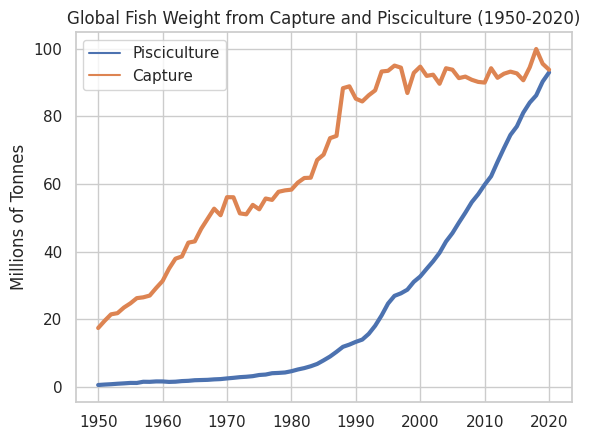

In [167]:
sns.set_theme(style = "whitegrid")

g = sns.lineplot(total_capture_aquaculture_melt, 
                 x = 'PERIOD', 
                 y = total_capture_aquaculture_melt['Tonnes'] / 1000000, 
                 hue = 'variable',
                 linewidth = 3)

g.legend_.set_title("")
# set new legend labels
new_labels = ['Pisciculture', 'Capture']
for t, l in zip(g.legend_.texts, new_labels):
    t.set_text(l)

g.set(xlabel = None,
      ylabel = "Millions of Tonnes",
      title = "Global Fish Weight from Capture and Pisciculture (1950-2020)")

plt.ticklabel_format(style='plain', axis='y')

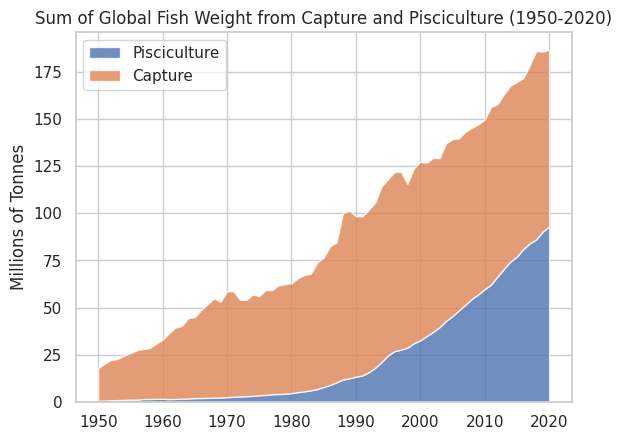

In [168]:
sns.set_theme(style = "whitegrid")

plt.stackplot(total_capture_aquaculture.PERIOD, total_capture_aquaculture.Quantity_Aquaculture / 1000000, 
              total_capture_aquaculture.Quantity_Capture / 1000000, labels=['Pisciculture', 'Capture'], alpha = 0.8)

plt.legend(loc='upper left')
plt.xlabel(None)
plt.ylabel("Millions of Tonnes")
plt.title("Sum of Global Fish Weight from Capture and Pisciculture (1950-2020)");

So global total fish production has not slowed down despite the stagnation in the production from capture. So with the seas unable to produce more we have increasingly turned to pisciculture to fill the growing demand. This is something that we have not really noticed in the west because we continue to fill our fish needs largely from capture, with the exception of salmon. While countries like China have fed a recent growth in fish demand by domestic pisciculture production.

### Look at when each water area started producing more from pisciculture than from capture

Get the total production per year for each water area. Then calculate the ratio to allow easy assessment of the relative changes in these two sources.

In [169]:
period_waterArea_group = (capture_aquaculture_merged
                          .groupby(['PERIOD', 'WaterArea'], as_index = False)
                          [['Quantity_Aquaculture', 'Quantity_Capture']]
                          .sum())

period_waterArea_group['Aquaculture_Capture_Ratio'] = period_waterArea_group['Quantity_Aquaculture'] / period_waterArea_group['Quantity_Capture']

period_waterArea_group['Inland_Oceanic'] = np.where(period_waterArea_group['WaterArea'].str.contains('Inland'), 'Inland', 'Oceanic')

Using this ratio, I can find the year when each water area produced more than from capture (or if it still hasn't surpassed).

In [170]:
date_aqua_gt_capture = (
    period_waterArea_group
    .loc[period_waterArea_group['Aquaculture_Capture_Ratio'] < 1]
    .groupby('WaterArea')
    .tail(1)[['WaterArea', 'PERIOD']]
)

date_aqua_gt_capture['PERIOD'] = date_aqua_gt_capture['PERIOD'].astype(str).str.replace('2020', '-')

date_aqua_gt_capture.rename(columns={'PERIOD': 'Year Pisciculture > Capture'}, inplace=True)

In [171]:
date_aqua_gt_capture[date_aqua_gt_capture['WaterArea'].str.contains('Inland')]

,WaterArea,Year Pisciculture > Capture
795,Asia - Inland waters,1983
913,"America, North - Inland waters",1988
949,Europe - Inland waters,1989
1414,"America, South - Inland waters",2008
1712,Africa - Inland waters,-
1729,Oceania - Inland waters,-


In [172]:
date_aqua_gt_capture[~date_aqua_gt_capture['WaterArea'].str.contains('Inland')]

,WaterArea,Year Pisciculture > Capture
1608,"Pacific, Northwest",2015
1715,Arctic Sea,-
1717,"Atlantic, Antarctic",-
1718,"Atlantic, Eastern Central",-
1719,"Atlantic, Northeast",-
1720,"Atlantic, Northwest",-
1721,"Atlantic, Southeast",-
1722,"Atlantic, Southwest",-
1723,"Atlantic, Western Central",-
1725,"Indian Ocean, Antarctic",-


So we can see that in general, the oceans still produce more from the capture, while in contrast inland waters are now producing more from pisciculure than capture in almost all continents. A notable exception is Africa.

## Inland fish capture and pisciculture

In [173]:
total_capture_aquaculture_inland = capture_aquaculture_merged.groupby(['PERIOD', 'WaterArea'], as_index=False)[['Quantity_Aquaculture', 'Quantity_Capture']].sum()

First focus on the difference between Asia and Africa

In [174]:
africa_asia_inland = ['Africa - Inland', 'Asia - Inland']

total_capture_aquaculture_inland = total_capture_aquaculture_inland[total_capture_aquaculture_inland['WaterArea'].str.contains('|'.join(africa_asia_inland))]

total_capture_aquaculture_inland = pd.melt(total_capture_aquaculture_inland, id_vars = ['PERIOD', 'WaterArea'], 
                                           value_vars = ['Quantity_Aquaculture', 'Quantity_Capture'],
                                           value_name = "Tonnes")

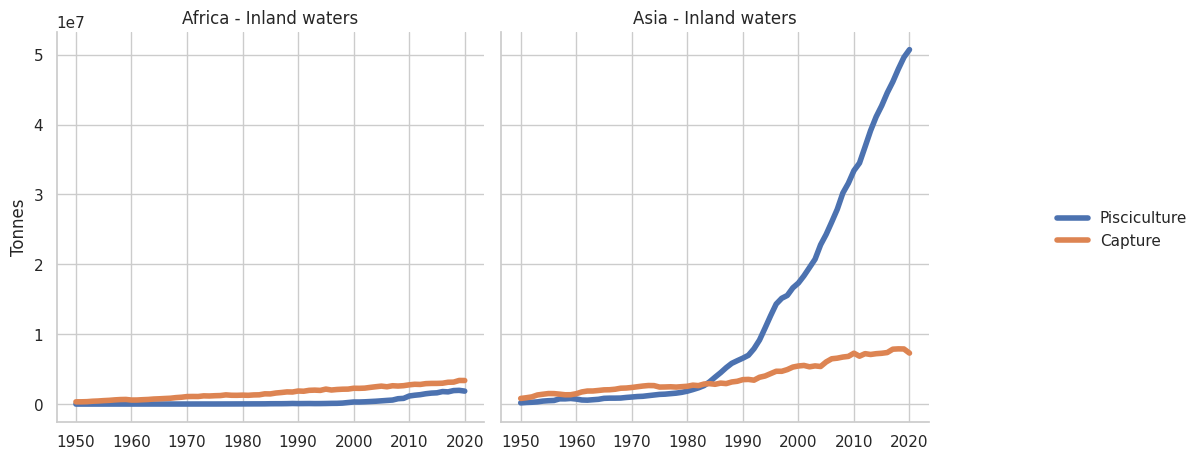

In [175]:
sns.set_theme(style = "whitegrid")

g = sns.FacetGrid(total_capture_aquaculture_inland, col = "WaterArea", 
                  hue = 'variable', sharey = True, height = 5, margin_titles=True)

g.set_titles(col_template = '{col_name}')

g.map(sns.lineplot, 'PERIOD', 'Tonnes', linewidth = 4)

g.add_legend()
g._legend.set_title("")
new_labels = ['Pisciculture', 'Capture']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
    
g.set(xlabel=None);

So we can see clearly the huge production levels from pisciculture in Asia which far outstrips capture by 4-5 times. It also clearly dwarfs the levels seen in Africa where the levels from capture are more comparable. 

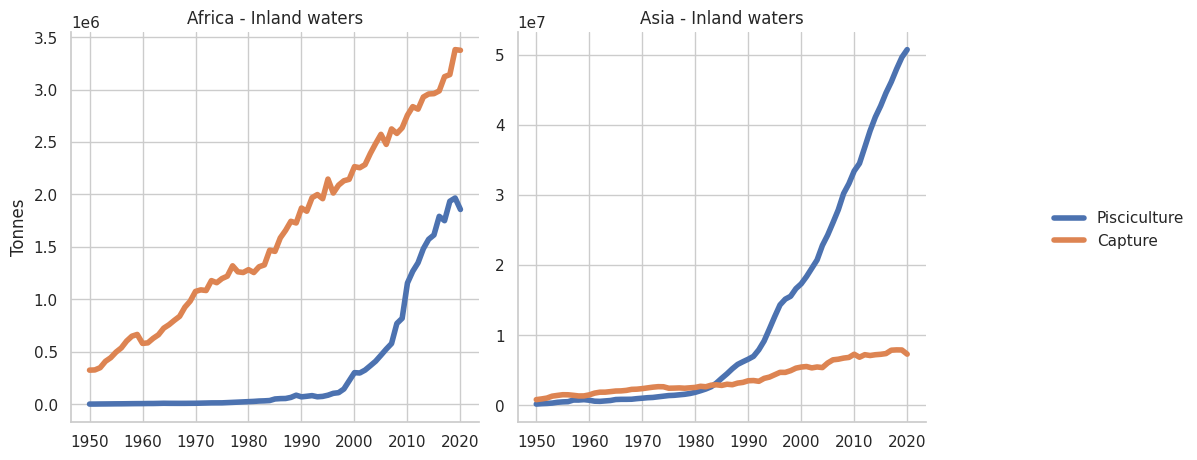

In [176]:
sns.set_theme(style = "whitegrid")

g = sns.FacetGrid(total_capture_aquaculture_inland, col = "WaterArea", 
                  hue = 'variable', sharey = False, height = 5, margin_titles=True)

g.set_titles(col_template = '{col_name}')

g.map(sns.lineplot, 'PERIOD', 'Tonnes', linewidth = 4)

g.add_legend()
g._legend.set_title("")
new_labels = ['Pisciculture', 'Capture']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
    
g.set(xlabel=None);

Plotting the same data but with individual axis, we can see that while levels are low, Africa has potentially already begun its development of pisciculture. The difference is that Asia began growing even before ocean stocks reached limits in production around the mid 90's. This suggests that much of the increase in global fish consumption could have been driven by a need for protein in developing countries while consumption levels have risen relatively little in developed countries who were already eating modern levels decades back.

In [177]:
total_capture_aquaculture_inland['Adj Year'] = np.where(total_capture_aquaculture_inland['WaterArea'] == 'Africa - Inland waters', 
                                                        total_capture_aquaculture_inland['PERIOD'] - 40, total_capture_aquaculture_inland['PERIOD'])

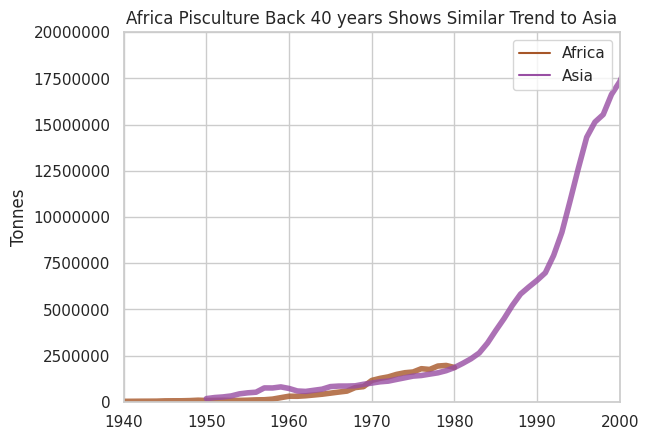

In [178]:
sns.set_theme(style = "whitegrid")

g = sns.lineplot(total_capture_aquaculture_inland[total_capture_aquaculture_inland['variable'] == 'Quantity_Aquaculture'], 
                 x = 'Adj Year', 
                 y = 'Tonnes', 
                 hue = 'WaterArea',
                 linewidth = 4,
                 alpha = 0.8,
                 palette = ['#a65628', '#984ea3'])

g.legend_.set_title("")
new_labels = ['Africa', 'Asia']
for t, l in zip(g.legend_.texts, new_labels):
    t.set_text(l)
    
g.set(xlabel = None,
      ylabel = "Tonnes",
      title = "Africa Pisculture Back 40 years Shows Similar Trend to Asia",
      xlim = (1940, 2000),
      ylim = (0,20000000))

plt.ticklabel_format(style='plain', axis='y')

Pushing the data from Africa back 40 years, we can see that it could be on a similar trajecrtory but it is still not past the main inflection point that Asia had.

## Now we want to focus on the pisciculture and identify possible factors that may influence in the potential and actual production levels. 

read in the prepared file produced from the "Metric of Untapped Potential"

In [179]:
total_aquaculture_quantity_value = pd.read_csv("./data/Pisciculture_Prepared_for_Indice_Analysis.csv")

In [180]:
total_aquaculture_quantity_value['Kg per capita'] = ((total_aquaculture_quantity_value['Quantity'] * 1000) / 
                                                   total_aquaculture_quantity_value['Population'])

In [181]:
total_aquaculture_quantity_value['log(Total Renewable Water)'] = np.log(total_aquaculture_quantity_value['Total Renewable Water'])

In [182]:
data = np.log(total_aquaculture_quantity_value['GDP per capita'] + 1)
total_aquaculture_quantity_value['GDP per capita'] = (data - np.min(data)) / (np.max(data) - np.min(data))

data = total_aquaculture_quantity_value['Logistic Index'] 
total_aquaculture_quantity_value['Logistic Index'] = ((data - np.min(data)) / (np.max(data) - np.min(data)))

data = total_aquaculture_quantity_value['log(Total Renewable Water)'] 
total_aquaculture_quantity_value['log(Total Renewable Water)'] = ((data - np.min(data)) / (np.max(data) - np.min(data)))

In [183]:
total_aquaculture_quantity_value.head()

,PERIOD,Quantity,Country,WaterArea,Environment,Species,Scientific_Name,Population,GDP per capita,Total Renewable Water,Logistic Index,Kg per capita,log(Total Renewable Water)
0,2020,8000.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38928346,0.108047,24.77,0.0,0.205506,0.550874
1,2019,7950.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38928346,0.108047,24.77,0.0,0.204221,0.550874
2,2018,7900.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38928346,0.108047,24.77,0.0,0.202937,0.550874
3,2017,6950.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38928346,0.108047,24.77,0.0,0.178533,0.550874
4,2016,6100.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38928346,0.108047,24.77,0.0,0.156698,0.550874


In [184]:
fresh_aquaculture_quantity_value = total_aquaculture_quantity_value[total_aquaculture_quantity_value['Environment'] == 'Freshwater']

We want to compare the relationships between the potential factors and the pisciculture from fresh water and the total

In [185]:
total_pairplot_data = (
    total_aquaculture_quantity_value[total_aquaculture_quantity_value['PERIOD'] > 2018]
    .groupby('Country', as_index = False)
    .agg({'Kg per capita': 'sum', 
          'GDP per capita': 'mean',
          'log(Total Renewable Water)': 'mean',
          'Logistic Index': 'mean'})
)
total_pairplot_data['log(Kg per capita)'] = np.log(total_pairplot_data['Kg per capita'])
total_pairplot_data = total_pairplot_data.drop(columns = ['Kg per capita'])
total_pairplot_data = total_pairplot_data[['log(Kg per capita)', 'GDP per capita', 'Logistic Index', 'log(Total Renewable Water)']]

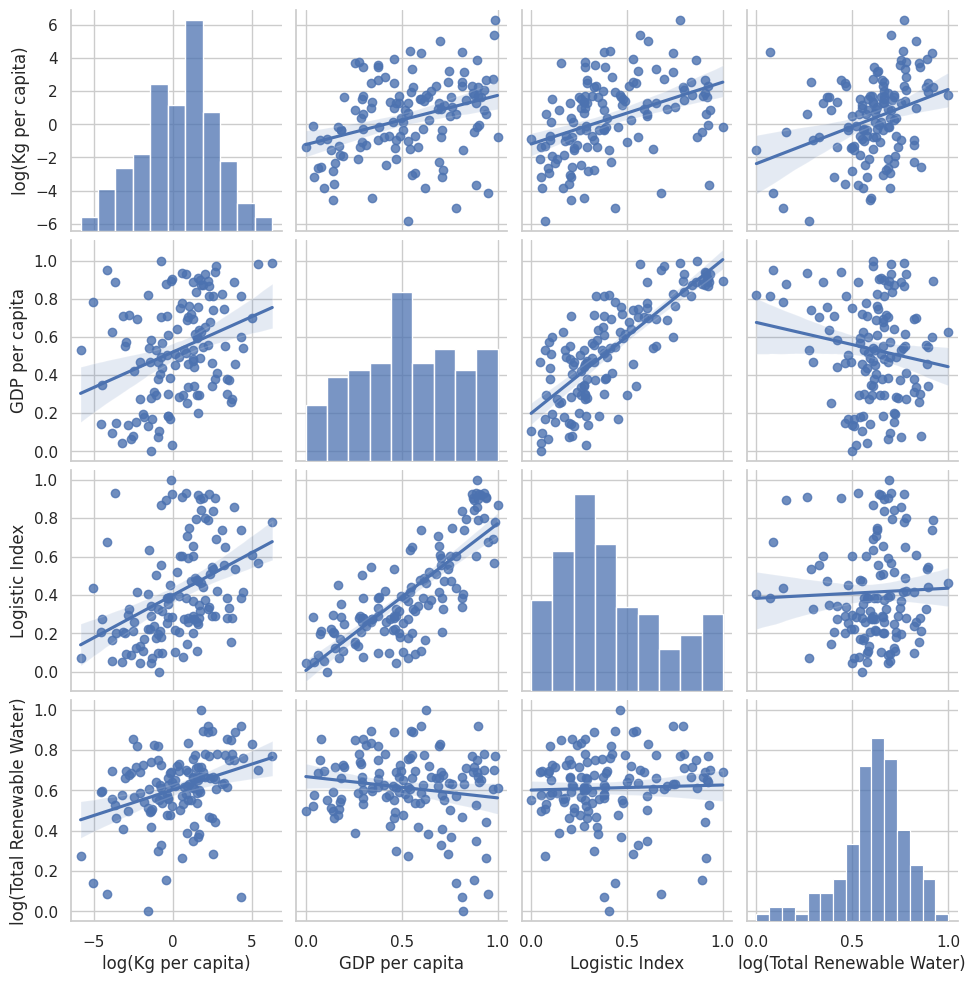

In [186]:
sns.pairplot(total_pairplot_data, kind = 'reg');

In [187]:
fresh_pairplot_data = (
    fresh_aquaculture_quantity_value[fresh_aquaculture_quantity_value['PERIOD'] > 2018]
    .groupby('Country', as_index = False)
    .agg({'Kg per capita': 'sum', 
          'GDP per capita': 'mean',
          'log(Total Renewable Water)': 'mean',
          'Logistic Index': 'mean'})
)
fresh_pairplot_data['log(Kg per capita)'] = np.log(fresh_pairplot_data['Kg per capita'])
fresh_pairplot_data = fresh_pairplot_data.drop(columns = ['Kg per capita'])
fresh_pairplot_data = fresh_pairplot_data[['log(Kg per capita)', 'GDP per capita', 'Logistic Index', 'log(Total Renewable Water)']]

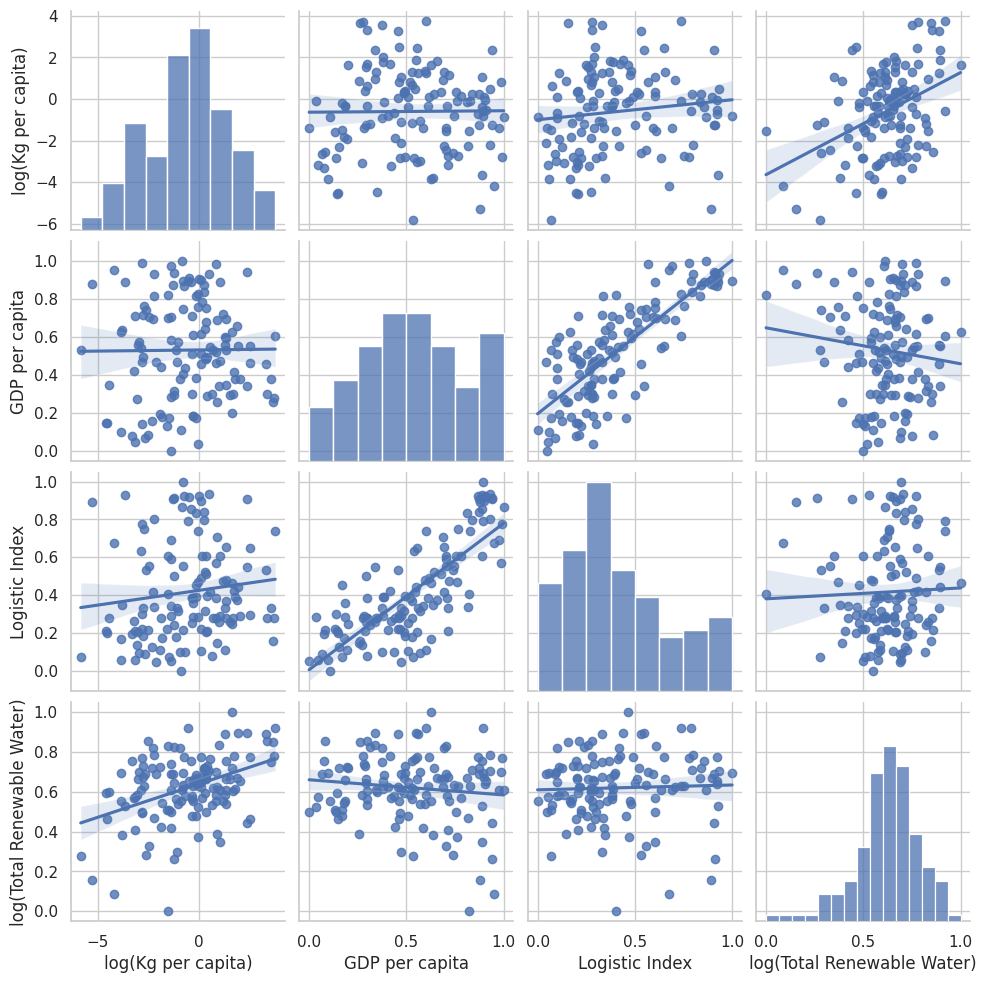

In [188]:
sns.pairplot(fresh_pairplot_data, kind = 'reg');

So there is a clearer relationship between the actual production from total pisciculture and the GDP/logistics than when only considering the fresh water. This suggests that these are relavent factors but that the data from freshwater pisciculture being skewed by poorer countries which have favoured it in response to needs for protein while the richer countries have other sources and can feed the demand from ocean capture and other animal sources, so their actual levels are lower.

### Creating the oppotunity index

In [189]:
fresh_aquaculture_quantity_value['Infrastructure Index'] = (fresh_aquaculture_quantity_value['GDP per capita'] + 
                                                  fresh_aquaculture_quantity_value['Logistic Index'])

data = fresh_aquaculture_quantity_value['Infrastructure Index']

fresh_aquaculture_quantity_value['Infrastructure Index'] = ((data - np.min(data)) / (np.max(data) - np.min(data)))

/home/sean/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/sean/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [190]:
fresh_aquaculture_quantity_value['Opportunity Index'] = (fresh_aquaculture_quantity_value['Infrastructure Index'] + 
                                                  fresh_aquaculture_quantity_value['log(Total Renewable Water)'])

data = fresh_aquaculture_quantity_value['Opportunity Index']

fresh_aquaculture_quantity_value['Opportunity Index'] = ((data - np.min(data)) / (np.max(data) - np.min(data)))

/home/sean/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/sean/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [191]:
fresh_aquaculture_quantity_value.head()

,PERIOD,Quantity,Country,WaterArea,Environment,Species,Scientific_Name,Population,GDP per capita,Total Renewable Water,Logistic Index,Kg per capita,log(Total Renewable Water),Infrastructure Index,Opportunity Index
0,2020,8000.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38928346,0.108047,24.77,0.0,0.205506,0.550874,0.032036,0.064731
1,2019,7950.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38928346,0.108047,24.77,0.0,0.204221,0.550874,0.032036,0.064731
2,2018,7900.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38928346,0.108047,24.77,0.0,0.202937,0.550874,0.032036,0.064731
3,2017,6950.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38928346,0.108047,24.77,0.0,0.178533,0.550874,0.032036,0.064731
4,2016,6100.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38928346,0.108047,24.77,0.0,0.156698,0.550874,0.032036,0.064731


In [192]:
opportunity_index_by_country = (fresh_aquaculture_quantity_value[fresh_aquaculture_quantity_value['PERIOD'] > 2018]
                               .groupby('Country', as_index = False)
                               .agg({'Opportunity Index': 'mean', 
                                     'Infrastructure Index': 'mean',
                                     'log(Total Renewable Water)': 'mean',
                                     'Kg per capita': 'sum'})
                               .sort_values(by = 'Opportunity Index', ascending = False))

opportunity_index_by_country['log(Kg per capita)'] = np.log(opportunity_index_by_country['Kg per capita'])

In [193]:
round(opportunity_index_by_country.head()[['Country', 'Opportunity Index']], 2)

,Country,Opportunity Index
21,Canada,1.00
64,Japan,0.93
89,Norway,0.92
47,Germany,0.91
6,Australia,0.91


In [194]:
round(opportunity_index_by_country.tail()[['Country', 'Opportunity Index']], 2)

,Country,Opportunity Index
87,Niger,0.08
0,Afghanistan,0.06
73,Lesotho,0.06
75,Libya,0.06
18,Burundi,0.00


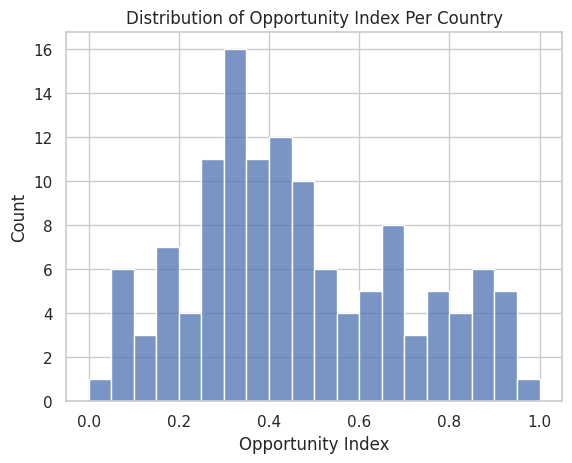

In [195]:
g = sns.histplot(data = opportunity_index_by_country, x = 'Opportunity Index', bins = 20)
g.set(title = 'Distribution of Opportunity Index Per Country');

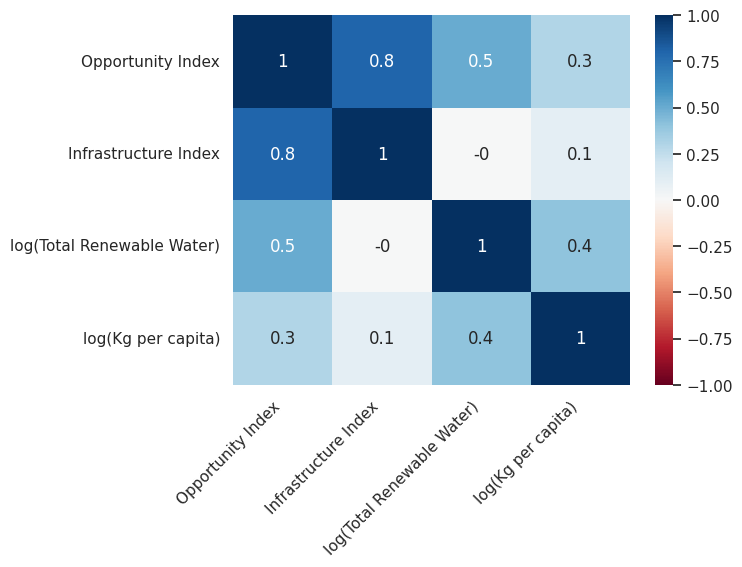

In [196]:
sns.heatmap(round(opportunity_index_by_country.drop(columns='Kg per capita').corr(), 1),
            vmin=-1, vmax=1, cmap='RdBu', annot=True)
plt.xticks(rotation = 45, ha="right");

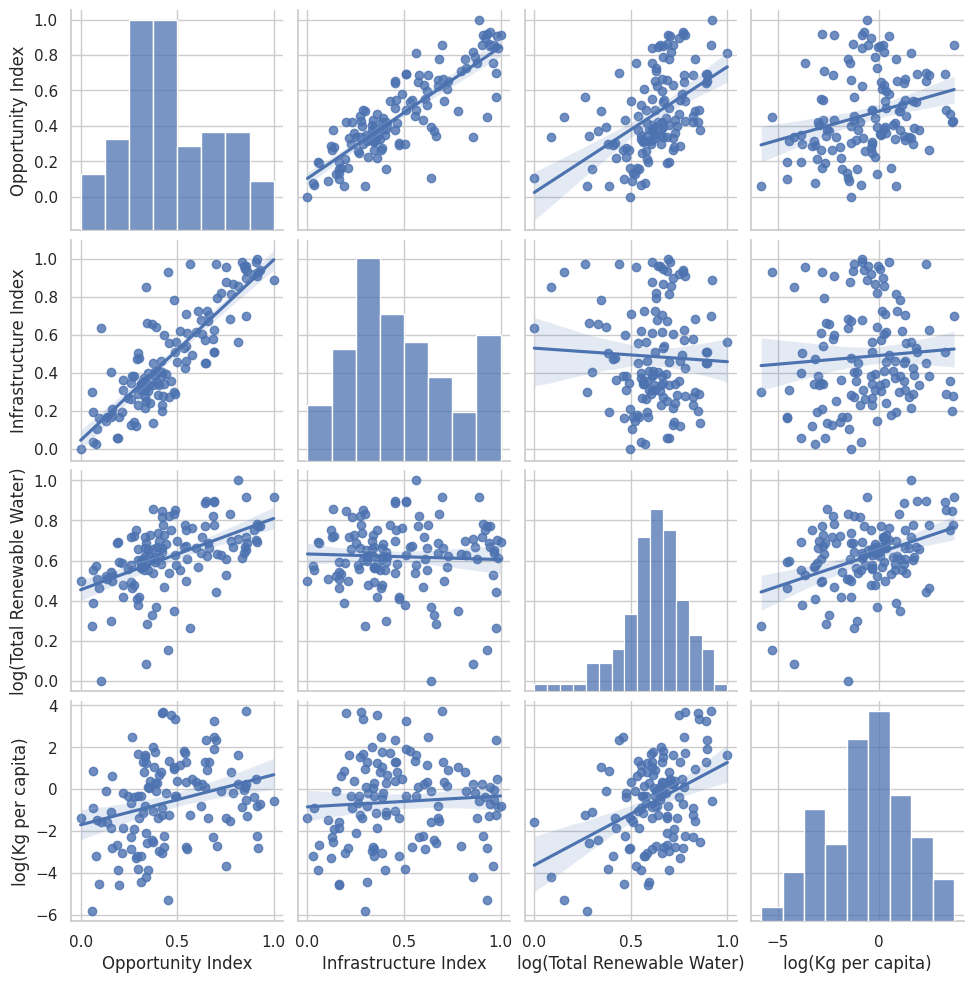

In [197]:
sns.pairplot(opportunity_index_by_country.drop(columns='Kg per capita'), kind = 'reg');

So, we see that the freshwater production does not correlate very strongly with the infrastructure index but weakly with the total water available.

In [198]:
total_aquaculture_quantity_value['Infrastructure Index'] = (total_aquaculture_quantity_value['GDP per capita'] + 
                                                  total_aquaculture_quantity_value['Logistic Index'])

data = total_aquaculture_quantity_value['Infrastructure Index']

total_aquaculture_quantity_value['Infrastructure Index'] = ((data - np.min(data)) / (np.max(data) - np.min(data)))

In [199]:
total_aquaculture_quantity_value['Opportunity Index'] = (total_aquaculture_quantity_value['Infrastructure Index'] + 
                                                  total_aquaculture_quantity_value['log(Total Renewable Water)'])

data = total_aquaculture_quantity_value['Opportunity Index']

total_aquaculture_quantity_value['Opportunity Index'] = ((data - np.min(data)) / (np.max(data) - np.min(data)))

In [200]:
opportunity_index_by_country_total = (total_aquaculture_quantity_value[total_aquaculture_quantity_value['PERIOD'] > 2018]
                               .groupby('Country', as_index = False)
                               .agg({'Opportunity Index': 'mean', 
                                     'Infrastructure Index': 'mean',
                                     'log(Total Renewable Water)': 'mean',
                                     'Kg per capita': 'sum'})
                               .sort_values(by = 'Opportunity Index', ascending = False))

opportunity_index_by_country_total['log(Kg per capita)'] = np.log(opportunity_index_by_country_total['Kg per capita'])

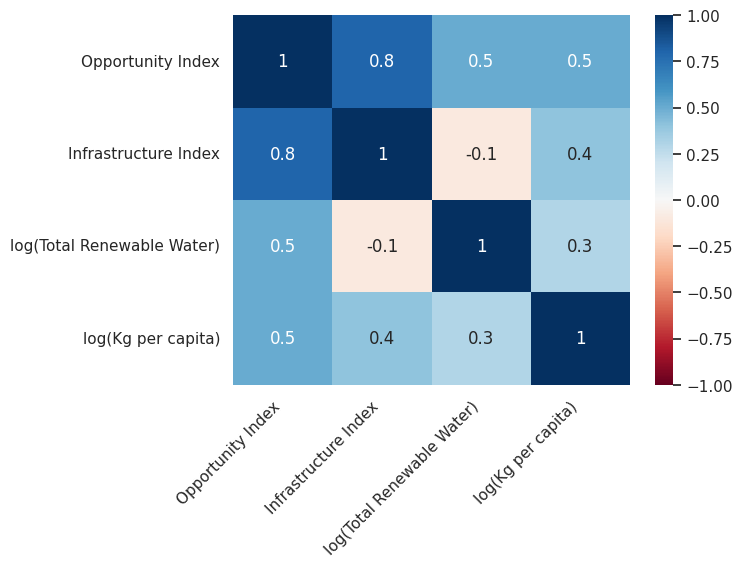

In [201]:
sns.heatmap(round(opportunity_index_by_country_total.drop(columns='Kg per capita').corr(), 1),
            vmin=-1, vmax=1, cmap='RdBu', annot=True)
plt.xticks(rotation = 45, ha="right");

### Creating the opportunity gap index

This is interested in the gap between the actual production level and what the oppotunity index suggests could be produced. It takes the maximum production level of all countries and subtracts that from the country level. A larger value represents lower production. This value is then multiplied by the oppotunity index. 

In [203]:
opportunity_index_by_country['Opportunity Gap Index'] = ((opportunity_index_by_country['log(Kg per capita)'].max() -
                                         opportunity_index_by_country['log(Kg per capita)']) *
                                        opportunity_index_by_country['Opportunity Index'])

In [204]:
data = opportunity_index_by_country['Opportunity Gap Index']
                     
opportunity_index_by_country['Opportunity Gap Index'] = ((data - np.min(data)) / (np.max(data) - np.min(data)))

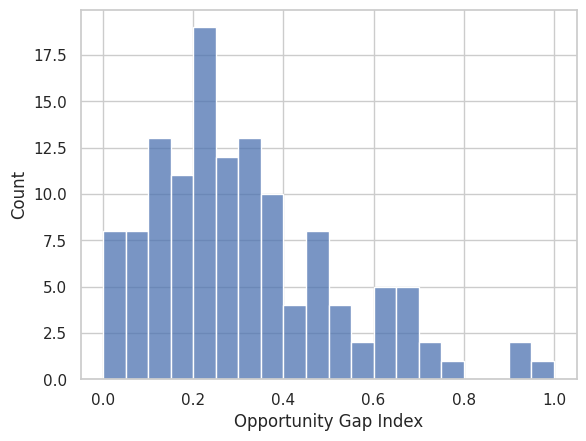

In [205]:
sns.histplot(data = opportunity_index_by_country, x = 'Opportunity Gap Index', bins = 20);

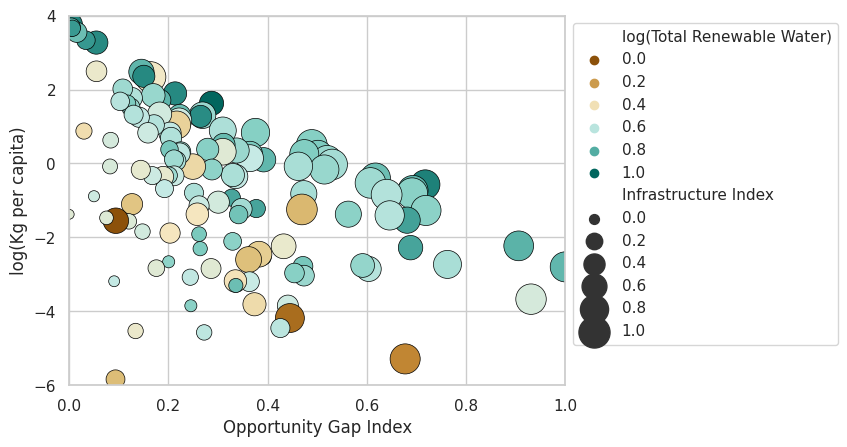

In [215]:
cmap = clr.LinearSegmentedColormap.from_list('dry to wet', 
                                             ['#8c510a','#bf812d','#dfc27d','#f6e8c3','#c7eae5','#80cdc1','#35978f','#01665e'], 
                                             N=256)

g = sns.scatterplot(data = opportunity_index_by_country, 
                x = 'Opportunity Gap Index', 
                y = 'log(Kg per capita)',
                hue = 'log(Total Renewable Water)',
                hue_norm=(0,1),
                size = 'Infrastructure Index',
                sizes = (50, 500),
                size_norm= (0,1),
                palette = cmap,
                linewidth = 0.5,
                edgecolor = 'black')

g.set(xlim = (0,1), ylim = (-6,4))

sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

In [210]:
africa_to_make_final_metric = opportunity_index_by_country[opportunity_index_by_country['Country']
                                                   .isin(variables.sub_saharan_african_countries)]

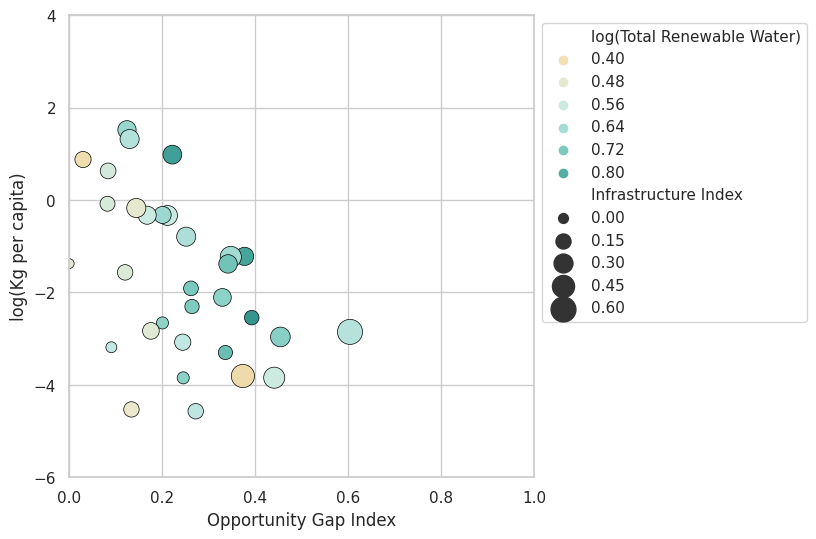

In [212]:
plt.figure(figsize=(6,6))

g = sns.scatterplot(data = africa_to_make_final_metric, 
                x = 'Opportunity Gap Index', 
                y = 'log(Kg per capita)',
                hue = 'log(Total Renewable Water)',
                hue_norm=(0,1),
                size = 'Infrastructure Index',
                sizes = (50,500),
                size_norm= (0,1),
                palette = cmap,
                linewidth = 0.5,
                edgecolor = 'black')

g.set(xlim = (0,1), ylim = (-6,4))

sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

In [213]:
asia_to_make_final_metric = opportunity_index_by_country[(opportunity_index_by_country['Country']
                                                           .isin(variables.east_asia)) | 
                                                          (opportunity_index_by_country['Country']
                                                           .isin(variables.south_east_asia))]

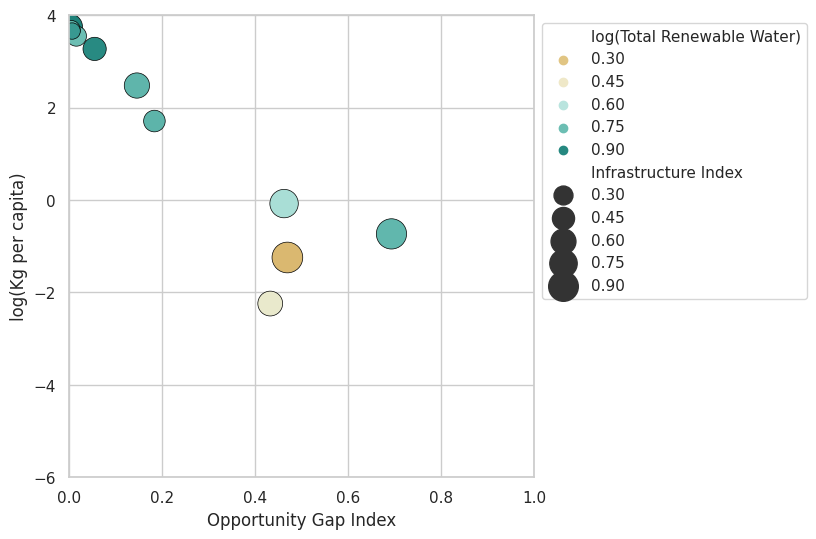

In [214]:
plt.figure(figsize=(6,6))
g = sns.scatterplot(data = asia_to_make_final_metric, 
                x = 'Opportunity Gap Index', 
                y = 'log(Kg per capita)',
                hue = 'log(Total Renewable Water)',
                hue_norm=(0,1),
                size = 'Infrastructure Index',
                sizes = (50,500),
                size_norm= (0,1),
                palette = cmap,
                linewidth = 0.5,
                edgecolor = 'black')
g.set(xlim = (0,1), ylim = (-6,4))
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

I want to finish off visualsing the patterns in 5 African countries.

In [216]:
aquaculture_quantity_value = pd.read_csv("./data/Aquaculture_Quantity_Code_Merged.csv", 
                                         usecols = ['PERIOD', 'Quantity', 'Country', 'WaterArea', 'Species', 'Scientific_Name', 'Environment'])
aquaculture_quantity_value.rename(columns={'Quantity': 'Tonnes'}, inplace=True)

In [217]:
population_by_country = pd.read_csv("./data/Population_by_Country.csv")

In [218]:
aquaculture_quantity_value = pd.merge(aquaculture_quantity_value, population_by_country)

aquaculture_quantity_value['Population'] = aquaculture_quantity_value['Population'] / 1000000

aquaculture_quantity_value.rename(columns = {'Population': 'Population (millions)'}, inplace = True)

In [219]:
aquaculture_quantity_value['Tonnes_Per_Million_People'] = aquaculture_quantity_value['Tonnes']  / aquaculture_quantity_value['Population (millions)']

In [221]:
africa_freshwater = aquaculture_quantity_value.loc[(aquaculture_quantity_value['WaterArea'] == 'Africa - Inland waters') & 
                                               (aquaculture_quantity_value['Environment'] == 'Freshwater') &
                                               (aquaculture_quantity_value['Country'] != 'Spain')]

In [222]:
africa_freshwater = africa_freshwater.drop(['WaterArea', 'Environment'], axis = 1)

In [223]:
four_examples_africa = (africa_freshwater[africa_freshwater['Country']
                   .isin(['Nigeria', 'South Africa', 'Gambia', 'Zambia', 'Ghana'])])

four_examples_africa = (four_examples_africa
                                 .groupby(['Country', 'PERIOD'], as_index = False)['Tonnes_Per_Million_People']
                                 .sum())

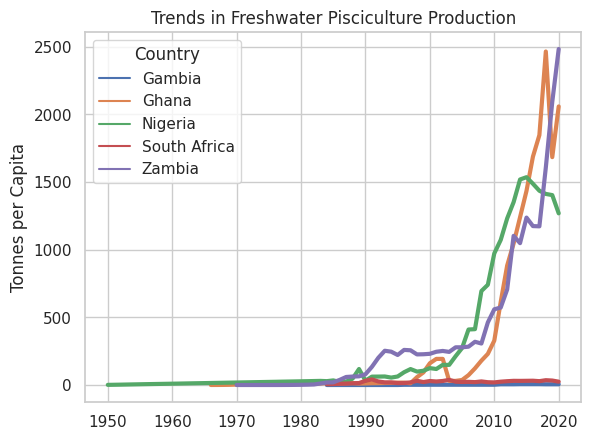

In [224]:
g = sns.lineplot(data=four_examples_africa, x = 'PERIOD', y = 'Tonnes_Per_Million_People', hue = 'Country', linewidth = 3)
g.set(title = 'Trends in Freshwater Pisciculture Production', 
      ylabel = "Tonnes per Capita",
      xlabel = "");

So we can see that South Africa has a very low production level which, given its good water resources and strong infrastructure could be increased. But this still depends on many other factors that would drive this sector. We can see growth in Zambia and Ghana for example which are countries less developed but possibly stand to benefit more (there is more local demand) for farmed fish.